In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("happiness_score.csv")

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.isnull().sum()
#checking null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

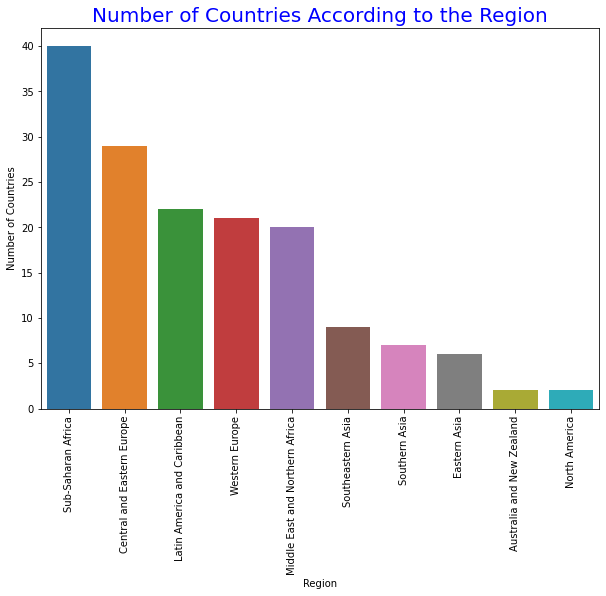

In [7]:
df_Regions= df.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = df_Regions.index, y = df_Regions.values)
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.ylabel('Number of Countries')
plt.title('Number of Countries According to the Region', color = 'blue', fontsize = 20)
plt.show()

In [8]:
df.drop(columns=["Happiness Rank","Standard Error","Generosity","Country","Region"],axis=1,inplace=True)
#dropping not useful columns

In [10]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
df=df[(z < 3).all(axis=1)]
#removing outliers

In [11]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>1:
        df[col]=np.log1p(df[col])
#removing skewness

In [12]:
df.skew()


Happiness Score                  0.177630
Economy (GDP per Capita)        -0.386242
Family                          -0.794179
Health (Life Expectancy)        -0.722058
Freedom                         -0.409116
Trust (Government Corruption)    1.099741
Dystopia Residual               -0.034512
dtype: float64

In [14]:
x=df.drop("Happiness Score",axis=1)
y=df["Happiness Score"]

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2_ score corresponding to ",final_r_state,"is",max_r_score)

max r2_ score corresponding to  72 is 0.9934725369107037


In [24]:
cross_val_score(lr,x,y,cv=5,scoring="r2").mean()
#value is less 

0.7388673571132225

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=70)
regressor.fit(x_train,y_train)
y_pred_=regressor.predict(x_test)
r2_scr=r2_score(y_test,y_pred_)
r2_scr

0.8271865582199605

In [26]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train, y_train)  #fit the model
pred=knn.predict(x_test) #make prediction on test set
print("r2_score",r2_score(y_test,pred))
#using knn regressor

r2_score 0.961746323226641


In [28]:
#saving decision tree model as it not too high nor too low
import joblib
joblib.dump(regressor,"world_happiness_report.pkl")

['world_happiness_report.pkl']